# Chapter 6: Working with Maps

## Introduction

## Visualizing the content of a 2D array

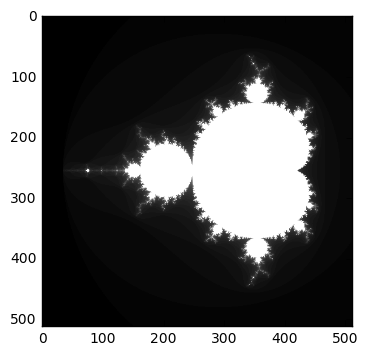

In [2]:
# %load Chapter6/01.py
import numpy
from matplotlib import pyplot as plot
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

N = 512
max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = numpy.empty((N, N))

for i, y in enumerate(Y):
	for j, x in enumerate(X):
		Z[i, j] = iter_count(complex(x, y), max_iter)

plot.imshow(Z, cmap = cm.gray)
plot.show()


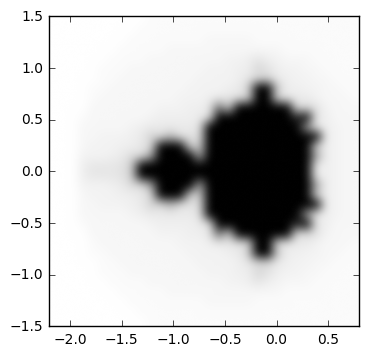

In [4]:
# %load Chapter6/02.py
import numpy
from matplotlib import pyplot as plot
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

N = 32
max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = numpy.empty((N, N))

for i, y in enumerate(Y):
	for j, x in enumerate(X):
		Z[i, j] = iter_count(complex(x, y), max_iter)

plot.imshow(Z,
            cmap = cm.binary,
            interpolation = 'bicubic',
            extent=(xmin, xmax, ymin, ymax))
plot.show()


## Adding a colormap legend to a figure

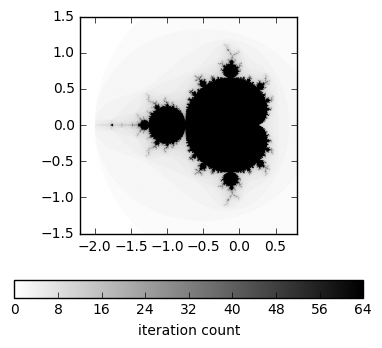

In [6]:
# %load Chapter6/03.py
import numpy
from matplotlib import pyplot as plot
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

N = 512
max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = numpy.empty((N, N))

for i, y in enumerate(Y):
	for j, x in enumerate(X):
		Z[i, j] = iter_count(complex(x, y), max_iter)

plot.imshow(Z,
            cmap = cm.binary,
            interpolation = 'bicubic',
            extent=(xmin, xmax, ymin, ymax))

cb = plot.colorbar(orientation='horizontal', shrink=.75)
cb.set_label('iteration count')

plot.show()


## Visualizing nonuniform 2D data

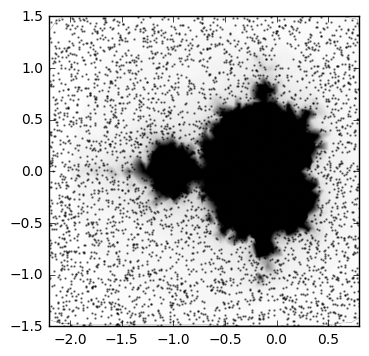

In [8]:
# %load Chapter6/04.py
import numpy
from numpy.random import uniform, seed

from matplotlib import pyplot as plot
from matplotlib.mlab import griddata
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

max_iter = 64
xmin, xmax, ymin, ymax = -2.2, .8, -1.5, 1.5

sample_count = 2 ** 12
A = uniform(xmin, xmax, sample_count)
B = uniform(ymin, ymax, sample_count)
C = [iter_count(complex(a, b), max_iter) for a, b in zip(A, B)]

N = 512
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = griddata(A, B, C, X, Y, interp = 'linear')

plot.scatter(A, B, color = (0., 0., 0., .5), s = .5)
plot.imshow(Z,
            cmap = cm.binary,
            interpolation = 'bicubic',
            extent=(xmin, xmax, ymin, ymax))
plot.show()


## Visualizing a 2D scalar field

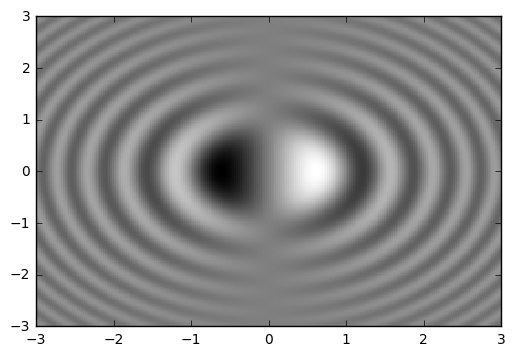

In [10]:
# %load Chapter6/05.py
import numpy
from matplotlib import pyplot as plot
import matplotlib.cm as cm

n = 256
x = numpy.linspace(-3., 3., n)
y = numpy.linspace(-3., 3., n)
X, Y = numpy.meshgrid(x, y)

Z = X * numpy.sinc(X ** 2 + Y ** 2)

plot.pcolormesh(X, Y, Z, cmap = cm.gray)
plot.show()


## Visualizing contour lines

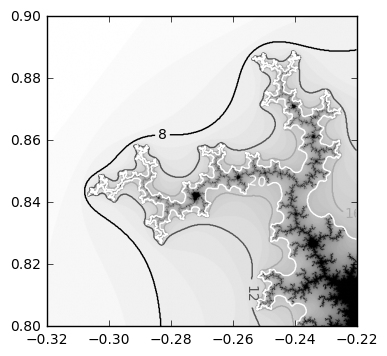

In [12]:
# %load Chapter6/06.py
import numpy
from matplotlib import pyplot as plot
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

N = 512
max_iter = 64
xmin, xmax, ymin, ymax = -0.32, -0.22, 0.8, 0.9
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = numpy.empty((N, N))

for i, y in enumerate(Y):
	for j, x in enumerate(X):
		Z[i, j] = iter_count(complex(x, y), max_iter)


plot.imshow(Z,
            cmap = cm.binary,
            interpolation = 'bicubic',
            origin = 'lower',
            extent=(xmin, xmax, ymin, ymax))

levels = [8, 12, 16, 20]
ct = plot.contour(X, Y, Z, levels, cmap = cm.gray)
plot.clabel(ct, fmt='%d')

plot.show()


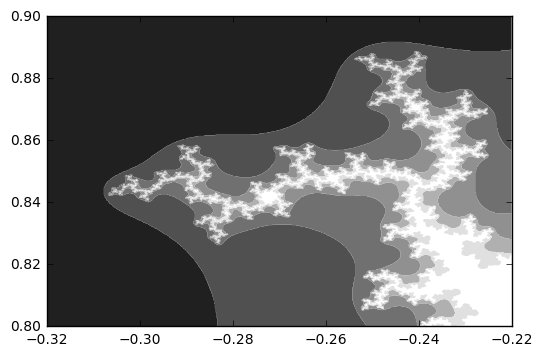

In [14]:
# %load Chapter6/07.py
import numpy
from matplotlib import pyplot as plot
import matplotlib.cm as cm

def iter_count(C, max_iter):
	X = C
	for n in range(max_iter):
		if abs(X) > 2.:
			return n
		X = X ** 2 + C
	return max_iter

N = 512
max_iter = 64
xmin, xmax, ymin, ymax = -0.32, -0.22, 0.8, 0.9
X = numpy.linspace(xmin, xmax, N)
Y = numpy.linspace(ymin, ymax, N)
Z = numpy.empty((N, N))

for i, y in enumerate(Y):
	for j, x in enumerate(X):
		Z[i, j] = iter_count(complex(x, y), max_iter)

levels = [0, 8, 12, 16, 20, 24, 32]
plot.contourf(X, Y, Z, levels, cmap = cm.gray, antialiased = True)
plot.show()


## Visualizing a 2D vector field

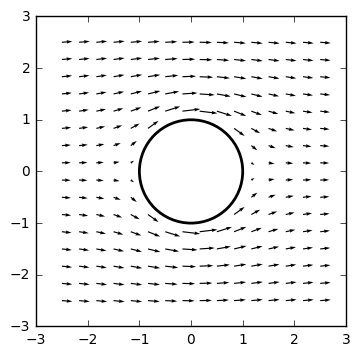

In [16]:
# %load Chapter6/08.py
import numpy, sympy
from sympy.abc import x, y
from matplotlib import pyplot as plot
import matplotlib.patches as patches

def cylinder_stream_function(U = 1, R = 1):
	r = sympy.sqrt(x ** 2 + y ** 2)
	theta = sympy.atan2(y, x)
	return U * (r - R ** 2 / r) * sympy.sin(theta)

def velocity_field(psi):
	u = sympy.lambdify((x, y), psi.diff(y), 'numpy')
	v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
	return u, v

psi = cylinder_stream_function()
U_func, V_func = velocity_field(psi)

xmin, xmax, ymin, ymax = -2.5, 2.5, -2.5, 2.5
Y, X = numpy.ogrid[ymin:ymax:16j, xmin:xmax:16j]
U, V = U_func(X, Y), V_func(X, Y)

M = (X ** 2 + Y ** 2) < 1.
U = numpy.ma.masked_array(U, mask = M)
V = numpy.ma.masked_array(V, mask = M)

shape = patches.Circle((0, 0), radius = 1., lw = 2., fc = 'w', ec = 'k', zorder = 0)
plot.gca().add_patch(shape)

plot.quiver(X, Y, U, V, zorder = 1)

plot.axes().set_aspect('equal')
plot.show()


## Visualizing the streamlines of a 2D vector field

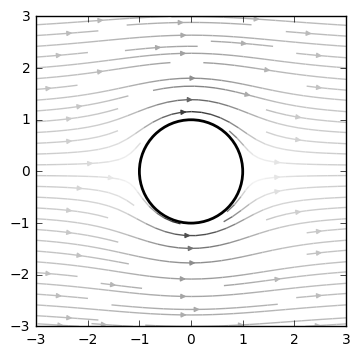

In [18]:
# %load Chapter6/09.py
import numpy, sympy
from sympy.abc import x, y
from matplotlib import pyplot as plot
import matplotlib.patches as patches
import matplotlib.cm as cm

def cylinder_stream_function(U = 1, R = 1):
	r = sympy.sqrt(x ** 2 + y ** 2)
	theta = sympy.atan2(y, x)
	return U * (r - R ** 2 / r) * sympy.sin(theta)

def velocity_field(psi):
	u = sympy.lambdify((x, y), psi.diff(y), 'numpy')
	v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
	return u, v

psi = cylinder_stream_function()
U_func, V_func = velocity_field(psi)

xmin, xmax, ymin, ymax = -3, 3, -3, 3
Y, X = numpy.ogrid[ymin:ymax:128j, xmin:xmax:128j]
U, V = U_func(X, Y), V_func(X, Y)

M = (X ** 2 + Y ** 2) < 1.
U = numpy.ma.masked_array(U, mask = M)
V = numpy.ma.masked_array(V, mask = M)

shape = patches.Circle((0, 0), radius = 1., lw = 2., fc = 'w', ec = 'k', zorder = 0)
plot.gca().add_patch(shape)

plot.streamplot(X, Y, U, V, color = U ** 2 + V ** 2, cmap = cm.binary)

plot.axes().set_aspect('equal')
plot.show()
